In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import vcf
import pandas as pd
from tqdm import tqdm
import statsmodels.api as sm
from qqman import qqman
import math

In [61]:
df = pd.read_csv('output.csv')
p_values = df['P'].to_numpy()

In [62]:
def QQPlot(pvals):
    # Sort the observed p-values
    pvals.sort()
    # Generate numbers from a uniform distribution
    n = len(pvals)
    a = .375 if n<=10 else .5
    unif = (np.arange(n) + 1 - a)/(n + 1 - 2*a)

    # Make a QQ plot
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(-1*np.log10(unif), -1*np.log10(pvals), s=5, color="black")
    ax.plot([0, 6], [0,6])
    # ax.set_xlim(left=0, right=3)
    # ax.set_ylim(bottom=0, top=max(-1*np.log10([item for item in pvals if item >0])))
    ax.set_xlabel("Expected -log10(P)")
    ax.set_ylabel("Observed -log10(P)")

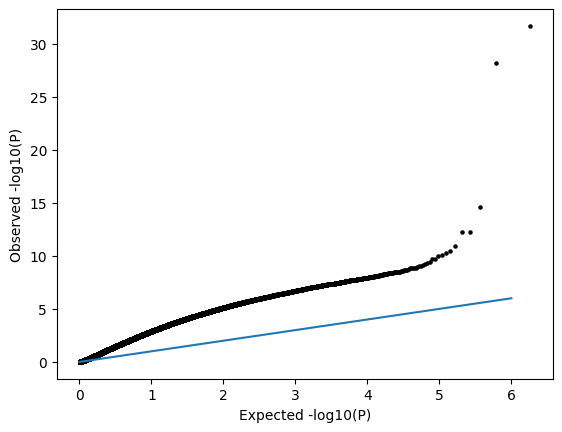

In [63]:
QQPlot(np.sort(p_values))

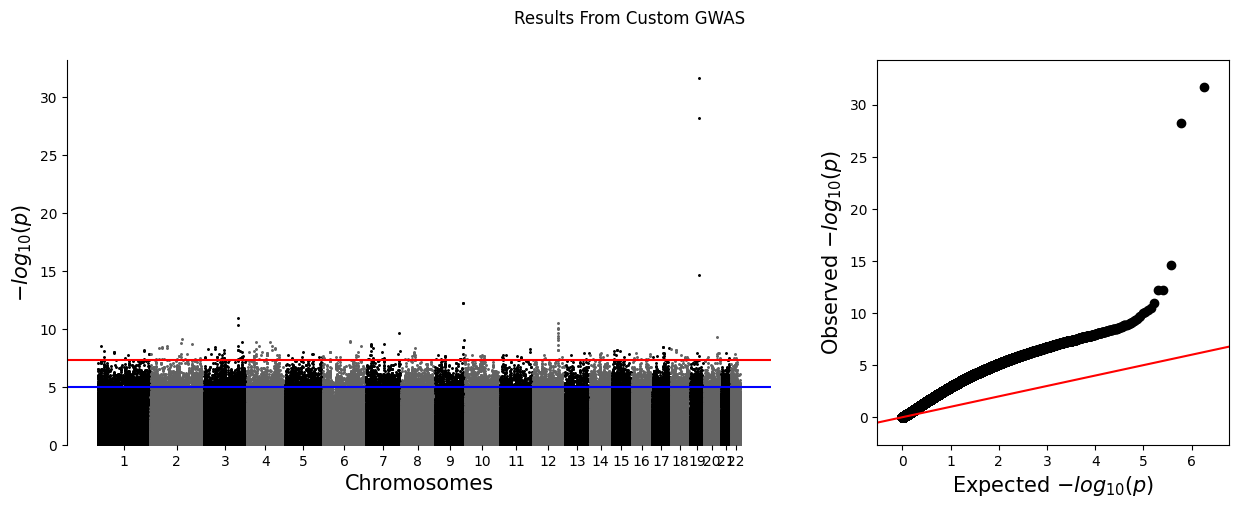

In [64]:
fig, (ax0, ax1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 1]})
fig.set_size_inches((15, 5))
fig.suptitle("Results From Custom GWAS")
qqman.manhattan(df, ax=ax0)
qqman.qqplot(df, ax=ax1)

In [65]:
# Upload ps3_gwas.assoc.linear from Problem Set 3
# Code will not run without it
# Alternatively, run the following command:
"""

"""
data = pd.read_csv("ps3_gwas.assoc.linear", delim_whitespace=True)
fig, (ax0, ax1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 1]})
fig.set_size_inches((15, 5))
fig.suptitle("Control: Problem Set 3, Question 2.1")
qqman.manhattan(data, ax=ax0)
qqman.qqplot(data, ax=ax1) 

FileNotFoundError: [Errno 2] No such file or directory: 'ps3_gwas.assoc.linear'

In [ ]:
def MSE(p_exp, p_obs):
    mse_no_nan = 0
    total = 0
    for i, val_exp in enumerate(p_exp):
        val_obs = p_obs[i]
        if not math.isnan(val_exp) and not math.isnan(val_obs):
            mse_no_nan += (val_obs - val_exp)**2
            total += 1
    return mse_no_nan/total

p_expected = data['P'].to_numpy()
mse = MSE(p_values, p_expected)
print("The mean squared error of p-values between plink and our implementation is:", mse)